# Part1: Data Preprocessing

In [1]:
# Importing the libraries  
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd  

In [2]:
# Importing the training set  
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')  
dataset_train


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [6]:
training_set=dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [7]:
# Feature Scaling  
from sklearn.preprocessing import MinMaxScaler  
sc=MinMaxScaler(feature_range=(0, 1))  
training_set_scaled=sc.fit_transform(training_set)  

In [8]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [9]:
# Creating a data structure with 60 timesteps and 1 output  
X_train=[]  
y_train=[]  
for i in range(60, 1258):  
    X_train.append(training_set_scaled[i-60:i, 0])  
    y_train.append(training_set_scaled[i, 0])  
X_train,y_train=np.array(X_train),np.array(y_train)  

In [10]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [11]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [12]:
# Reshaping  
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1], 1))  

In [13]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

# Part 2 - Building the RNN

In [14]:
# Importing the Keras libraries and packages  
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import Dropout  

In [15]:
# Initialising the RNN  
regressor=Sequential()  

In [16]:
# Adding the first LSTM layer and some Dropout regularization  
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))  

In [17]:
regressor.add(Dropout(0.2))  

In [18]:
# Adding a second LSTM layer and some Dropout regularization  
regressor.add(LSTM(units=50,return_sequences=True))  
regressor.add(Dropout(0.2))  

In [19]:
# Adding a third LSTM layer and some Dropout regularization  
regressor.add(LSTM(units=50,return_sequences=True))  
regressor.add(Dropout(0.2))  

In [20]:
# Adding a fourth LSTM layer and some Dropout regularization  
regressor.add(LSTM(units=50))  
regressor.add(Dropout(0.2))  

In [21]:
# Adding the output layer  
regressor.add(Dense(units=1))  

In [22]:
# Compiling the RNN  
regressor.compile(optimizer='adam',loss='mean_squared_error')  

In [23]:
# Fitting the RNN to the Training set  
regressor.fit(X_train,y_train,epochs=100,batch_size=32)  

Epoch 1/100
38/38 [==============================] - 35s 476ms/step - loss: 0.0438
Epoch 2/100
38/38 [==============================] - 21s 545ms/step - loss: 0.0072
Epoch 3/100
38/38 [==============================] - 18s 483ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 23s 619ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 18s 485ms/step - loss: 0.0058
Epoch 6/100
38/38 [==============================] - 22s 578ms/step - loss: 0.0055
Epoch 7/100
38/38 [==============================] - 24s 646ms/step - loss: 0.0051
Epoch 8/100
38/38 [==============================] - 20s 508ms/step - loss: 0.0057
Epoch 9/100
38/38 [==============================] - 26s 691ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 19s 506ms/step - loss: 0.0046
Epoch 11/100
38/38 [==============================] - 24s 641ms/step - loss: 0.0044
Epoch 12/100
38/38 [==============================] - 24s 642ms/step - loss: 0.0044
E

38/38 [==============================] - 41s 1s/step - loss: 0.0015
Epoch 99/100
38/38 [==============================] - 43s 1s/step - loss: 0.0015
Epoch 100/100
38/38 [==============================] - 43s 1s/step - loss: 0.0014


# Part 3 - Making the predictions and visualizing the results

In [24]:
# Getting the real stock price of 2017  
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')  
dataset_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [25]:
real_stock_price=dataset_test.iloc[:, 1:2].values  

In [26]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [27]:
# Getting the predicted stock price of 2017  
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)  

In [28]:
dataset_total

0     325.25
1     331.27
2     329.83
3     328.34
4     322.04
       ...  
15    829.62
16    837.81
17    834.71
18    814.66
19    796.86
Name: Open, Length: 1278, dtype: float64

In [29]:
inputs=dataset_total[len(dataset_total)-len(dataset_test) - 60:].values  

In [30]:
inputs=inputs.reshape(-1,1)  

In [31]:
inputs=sc.transform(inputs) 

In [32]:
X_test = []  
for i in range(60, 80):  
    X_test.append(inputs[i-60:i, 0])  
X_test = np.array(X_test)  
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))  

In [33]:
predicted_stock_price = regressor.predict(X_test)  

1/1 [==============================] - 8s 8s/step


In [34]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)  

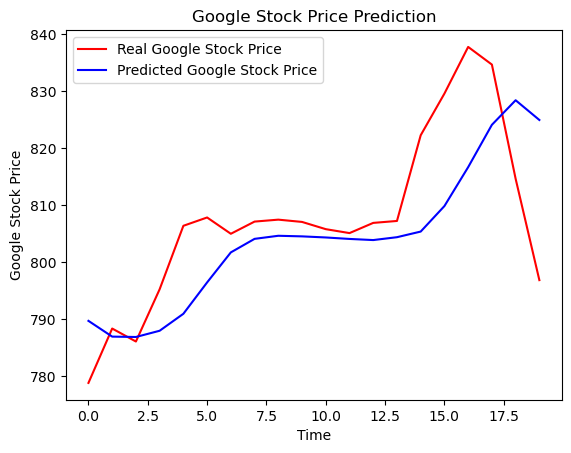

In [35]:
# Visualizing the results  
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')  
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')  
plt.title('Google Stock Price Prediction')  
plt.xlabel('Time')  
plt.ylabel('Google Stock Price')  
plt.legend()  
plt.show()  